In [1]:
#importing the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#importing the dataset
cars_data = pd.read_csv("F:\DS and ML\Data_Sets\cars_sampled.csv")
cars_data.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 0:00,27449,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19/03/2016 0:00,34537,7/4/2016 4:44
4,16/03/2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16/03/2016 0:00,55270,1/4/2016 23:18


In [3]:
data = cars_data.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

In [4]:
#removing unwanted features
cols = ['dateCrawled','name','lastSeen','postalCode','dateCreated','model']
data.drop(cols,axis=1,inplace=True)
data.head()

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,private,offer,4450,test,limousine,2003,manual,150,150000,3,diesel,bmw,NaN
1,private,offer,13299,control,suv,2005,manual,163,150000,6,diesel,volvo,no
2,private,offer,3200,test,bus,2003,manual,101,150000,11,diesel,volkswagen,NaN
3,private,offer,4500,control,small car,2006,manual,86,60000,12,petrol,seat,no
4,private,offer,18750,test,suv,2008,automatic,185,150000,11,diesel,volvo,no


In [5]:
#Dropping duplicate records
data.drop_duplicates(keep='first',inplace=True)

In [6]:
#Checking for null values
data.isna().sum()

seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5132
yearOfRegistration        0
gearbox                2745
powerPS                   0
kilometer                 0
monthOfRegistration       0
fuelType               4449
brand                     0
notRepairedDamage      9619
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49492 entries, 0 to 50000
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   seller               49492 non-null  object
 1   offerType            49492 non-null  object
 2   price                49492 non-null  int64 
 3   abtest               49492 non-null  object
 4   vehicleType          44360 non-null  object
 5   yearOfRegistration   49492 non-null  int64 
 6   gearbox              46747 non-null  object
 7   powerPS              49492 non-null  int64 
 8   kilometer            49492 non-null  int64 
 9   monthOfRegistration  49492 non-null  int64 
 10  fuelType             45043 non-null  object
 11  brand                49492 non-null  object
 12  notRepairedDamage    39873 non-null  object
dtypes: int64(5), object(8)
memory usage: 5.3+ MB


In [8]:
data.nunique()

seller                    2
offerType                 2
price                  2393
abtest                    2
vehicleType               8
yearOfRegistration       97
gearbox                   2
powerPS                 460
kilometer                13
monthOfRegistration      13
fuelType                  7
brand                    40
notRepairedDamage         2
dtype: int64

## Exploratory Data Analysis

In [9]:
data.describe(include='all')

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
count,49492,49492,4.949200e+04,49492,44360,49492.000000,46747,49492.000000,49492.000000,49492.000000,45043,49492,39873
unique,2,2,NaN,2,8,NaN,2,NaN,NaN,NaN,7,40,2
top,private,offer,NaN,test,limousine,NaN,manual,NaN,NaN,NaN,petrol,volkswagen,no
freq,49490,49489,NaN,25584,12889,NaN,36424,NaN,NaN,NaN,29988,10497,34961
mean,NaN,NaN,6.569980e+03,NaN,NaN,2005.562030,NaN,116.542754,125648.589671,5.742302,NaN,NaN,NaN
std,NaN,NaN,8.625619e+04,NaN,NaN,123.620025,NaN,231.611829,40183.081618,3.708862,NaN,NaN,NaN
min,NaN,NaN,0.000000e+00,NaN,NaN,1000.000000,NaN,0.000000,5000.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,1.150000e+03,NaN,NaN,1999.000000,NaN,70.000000,125000.000000,3.000000,NaN,NaN,NaN
50%,NaN,NaN,2.950000e+03,NaN,NaN,2003.000000,NaN,105.000000,150000.000000,6.000000,NaN,NaN,NaN
75%,NaN,NaN,7.100000e+03,NaN,NaN,2008.000000,NaN,150.000000,150000.000000,9.000000,NaN,NaN,NaN


C:\Users\Chinmaya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='seller', ylabel='count'>

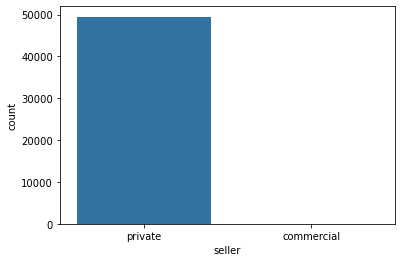

In [10]:
sns.countplot(data.seller)

In [11]:
#since commercial vehicle count is neglegible compared to private. So the seller column is dropped
data.drop('seller',axis=1,inplace=True)

C:\Users\Chinmaya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='offerType', ylabel='count'>

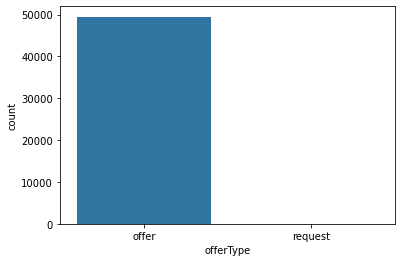

In [12]:
sns.countplot(data.offerType)

In [13]:
data.drop('offerType',axis=1,inplace=True)

C:\Users\Chinmaya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

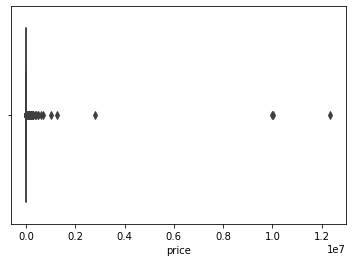

In [14]:
sns.boxplot(data.price)

From the above boxplot it is observed that the there are too many outliers. Also min. value of price is zero which is also outlier. So we have to fix the working range.

Price of the vehicle are taken with the range 100 to 200000

In [15]:
data[(data.price<100) | (data.price>250000)]

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
43,0,control,NaN,2000,NaN,45,100000,0,NaN,daihatsu,NaN
74,0,control,NaN,1995,automatic,0,150000,5,petrol,opel,NaN
78,0,test,limousine,1998,manual,75,150000,0,petrol,seat,yes
85,0,control,NaN,2016,manual,0,150000,0,diesel,peugeot,NaN
94,0,test,small car,1996,manual,125,150000,9,petrol,audi,no
...,...,...,...,...,...,...,...,...,...,...,...
49915,0,test,limousine,1995,manual,101,150000,2,petrol,audi,yes
49925,0,test,NaN,2017,manual,0,150000,10,petrol,ford,NaN
49980,0,control,NaN,2017,manual,90,150000,3,NaN,volkswagen,no
49996,0,test,bus,2005,NaN,0,150000,0,NaN,volkswagen,NaN


C:\Users\Chinmaya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='abtest', ylabel='count'>

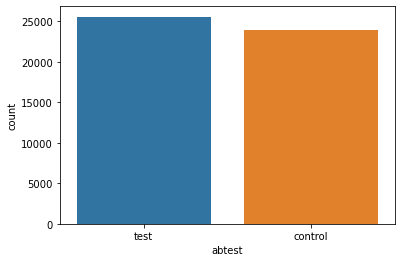

In [16]:
sns.countplot(data.abtest)

C:\Users\Chinmaya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


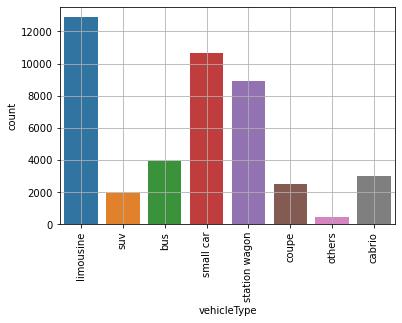

In [17]:
sns.countplot(data.vehicleType)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

Fixing the year of registration range between 1970 to 2018

In [18]:
data.yearOfRegistration.value_counts().sort_index()

1000     6
1255     1
1500     2
1910    14
1928     1
        ..
7500     1
7800     1
8500     1
8888     2
9999     7
Name: yearOfRegistration, Length: 97, dtype: int64

In [19]:
data[(data.yearOfRegistration<1970) | (data.yearOfRegistration>2018)]

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
69,205000,control,cabrio,1952,manual,116,100000,9,petrol,mercedes_benz,no
539,2500,test,others,1961,manual,31,5000,0,diesel,ford,NaN
604,9999,test,NaN,1960,NaN,0,5000,0,NaN,mercedes_benz,NaN
653,1399,test,limousine,1966,manual,0,100000,0,petrol,volkswagen,NaN
665,3000,test,NaN,1960,NaN,0,150000,0,NaN,sonstige_autos,NaN
...,...,...,...,...,...,...,...,...,...,...,...
48378,4900,test,limousine,1960,automatic,0,5000,8,petrol,sonstige_autos,no
48444,19999,test,limousine,1969,automatic,300,100000,3,petrol,sonstige_autos,no
49216,0,control,NaN,2019,manual,0,150000,2,petrol,renault,yes
49222,0,test,suv,1956,NaN,0,100000,0,NaN,volvo,NaN


There are 254 records which are not in this range

C:\Users\Chinmaya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gearbox', ylabel='count'>

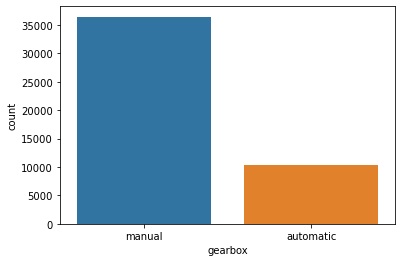

In [20]:
sns.countplot(data.gearbox)

C:\Users\Chinmaya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='powerPS'>

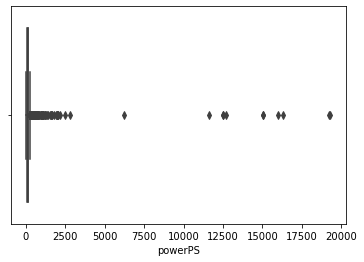

In [21]:
sns.boxplot(data.powerPS)

Fixing the powerps range to be 10 to 500

In [22]:
data[(data.powerPS<10) | (data.powerPS>500)]

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
6,400,test,station wagon,1996,manual,0,150000,5,petrol,opel,NaN
19,698,test,NaN,2017,NaN,0,150000,0,NaN,volkswagen,NaN
31,549,test,small car,1996,manual,0,150000,0,NaN,volkswagen,yes
35,400,test,NaN,2005,NaN,0,125000,0,NaN,ford,NaN
49,1000,control,small car,2001,manual,0,150000,10,petrol,nissan,NaN
...,...,...,...,...,...,...,...,...,...,...,...
49977,400,control,small car,1998,NaN,0,5000,11,petrol,opel,no
49996,0,test,bus,2005,NaN,0,150000,0,NaN,volkswagen,NaN
49997,19999,control,NaN,1990,NaN,0,5000,0,NaN,volkswagen,NaN
49998,0,test,coupe,2004,manual,0,150000,1,petrol,bmw,no


There are 5752 records which doesnot fall in this range

C:\Users\Chinmaya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='kilometer'>

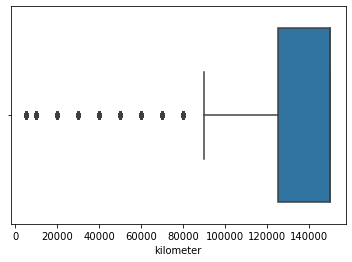

In [23]:
sns.boxplot(data.kilometer)

In [24]:
#Converting Month of registration to year
data.monthOfRegistration = round(data.monthOfRegistration/12,2)
data.head()

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,4450,test,limousine,2003,manual,150,150000,0.25,diesel,bmw,NaN
1,13299,control,suv,2005,manual,163,150000,0.50,diesel,volvo,no
2,3200,test,bus,2003,manual,101,150000,0.92,diesel,volkswagen,NaN
3,4500,control,small car,2006,manual,86,60000,1.00,petrol,seat,no
4,18750,test,suv,2008,automatic,185,150000,0.92,diesel,volvo,no


C:\Users\Chinmaya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fuelType', ylabel='count'>

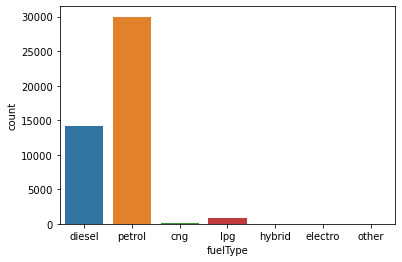

In [25]:
sns.countplot(data.fuelType)

In [26]:
pd.crosstab(data.fuelType,'count')

col_0,count
fuelType,
cng,79
diesel,14126
electro,14
hybrid,39
lpg,771
other,26
petrol,29988


C:\Users\Chinmaya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='notRepairedDamage', ylabel='count'>

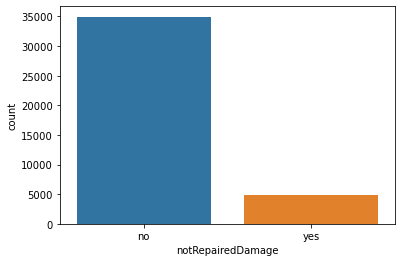

In [27]:
sns.countplot(data.notRepairedDamage)

selecting the data for assumed ranges

In [28]:
cars = data[(data.yearOfRegistration >= 1970) &
           (data.yearOfRegistration <= 2018) &
           (data.price >= 100) &
           (data.price <= 200000) &
           (data.powerPS >= 10) &
           (data.powerPS <= 500)]

In [29]:
cars.shape

(42646, 11)

7400 records are removed and 10 features are selected to build the algorithm

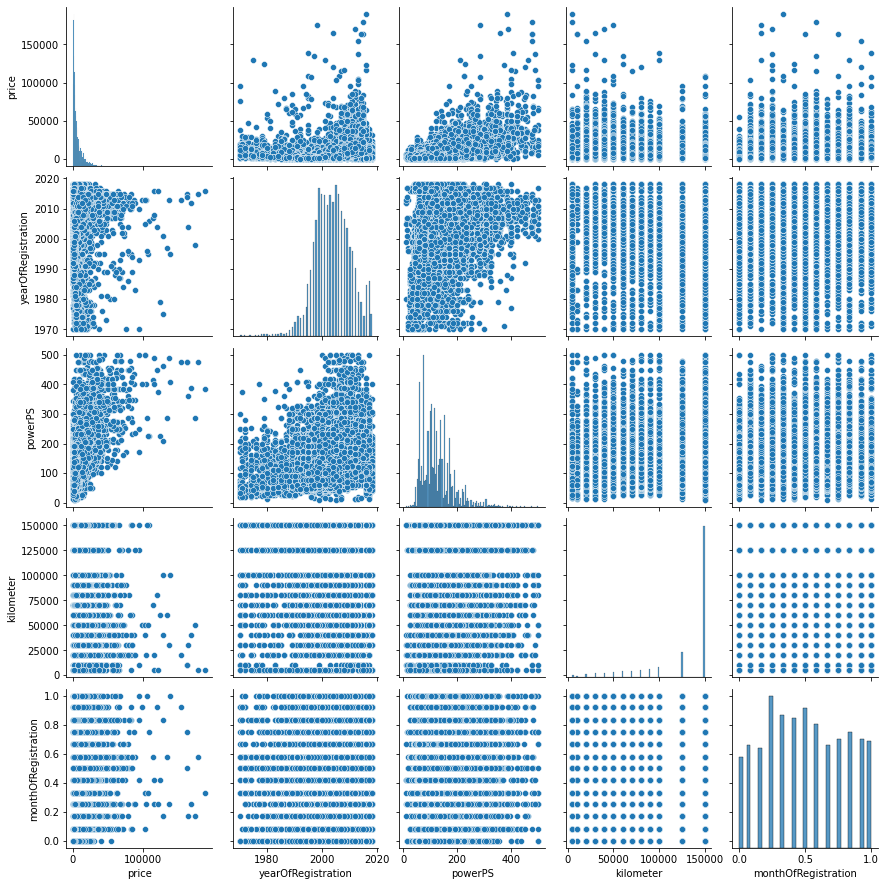

In [30]:
sns.pairplot(cars)

In [31]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42646 entries, 0 to 50000
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                42646 non-null  int64  
 1   abtest               42646 non-null  object 
 2   vehicleType          39774 non-null  object 
 3   yearOfRegistration   42646 non-null  int64  
 4   gearbox              41858 non-null  object 
 5   powerPS              42646 non-null  int64  
 6   kilometer            42646 non-null  int64  
 7   monthOfRegistration  42646 non-null  float64
 8   fuelType             40059 non-null  object 
 9   brand                42646 non-null  object 
 10  notRepairedDamage    36397 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 3.9+ MB


In [32]:
cars.isna().sum()

price                     0
abtest                    0
vehicleType            2872
yearOfRegistration        0
gearbox                 788
powerPS                   0
kilometer                 0
monthOfRegistration       0
fuelType               2587
brand                     0
notRepairedDamage      6249
dtype: int64

In [33]:
#creating new feature age of the vehicle till 2019
cars['Age'] = (2019 - cars.yearOfRegistration) + cars.monthOfRegistration
cars.head()

<ipython-input-33-fbefc21756dc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars['Age'] = (2019 - cars.yearOfRegistration) + cars.monthOfRegistration


,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,Age
0,4450,test,limousine,2003,manual,150,150000,0.25,diesel,bmw,NaN,16.25
1,13299,control,suv,2005,manual,163,150000,0.50,diesel,volvo,no,14.50
2,3200,test,bus,2003,manual,101,150000,0.92,diesel,volkswagen,NaN,16.92
3,4500,control,small car,2006,manual,86,60000,1.00,petrol,seat,no,14.00
4,18750,test,suv,2008,automatic,185,150000,0.92,diesel,volvo,no,11.92


In [34]:
cars.drop(['yearOfRegistration','monthOfRegistration'],axis=1,inplace=True)

C:\Users\Chinmaya\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [35]:
cars.head()

,price,abtest,vehicleType,gearbox,powerPS,kilometer,fuelType,brand,notRepairedDamage,Age
0,4450,test,limousine,manual,150,150000,diesel,bmw,NaN,16.25
1,13299,control,suv,manual,163,150000,diesel,volvo,no,14.50
2,3200,test,bus,manual,101,150000,diesel,volkswagen,NaN,16.92
3,4500,control,small car,manual,86,60000,petrol,seat,no,14.00
4,18750,test,suv,automatic,185,150000,diesel,volvo,no,11.92


<AxesSubplot:xlabel='abtest', ylabel='price'>

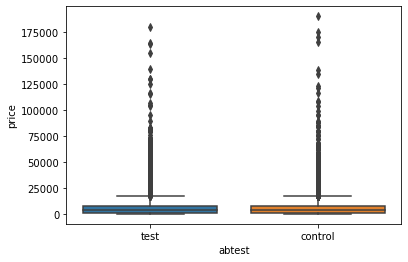

In [36]:
sns.boxplot(x = 'abtest', y='price', data=cars)

For every price value, there is 50-50 distribution, i.e., insignificant doesnot affect price

In [37]:
cars.drop('abtest',axis=1,inplace=True)

C:\Users\Chinmaya\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [38]:
cars.head()

,price,vehicleType,gearbox,powerPS,kilometer,fuelType,brand,notRepairedDamage,Age
0,4450,limousine,manual,150,150000,diesel,bmw,NaN,16.25
1,13299,suv,manual,163,150000,diesel,volvo,no,14.50
2,3200,bus,manual,101,150000,diesel,volkswagen,NaN,16.92
3,4500,small car,manual,86,60000,petrol,seat,no,14.00
4,18750,suv,automatic,185,150000,diesel,volvo,no,11.92


<AxesSubplot:xlabel='brand', ylabel='price'>

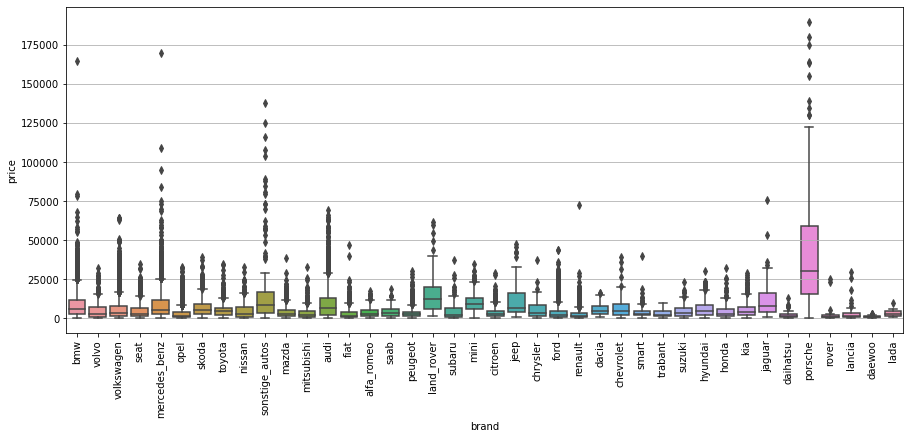

In [39]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
plt.grid()
sns.boxplot(x='brand',y='price',data=cars)

<AxesSubplot:>

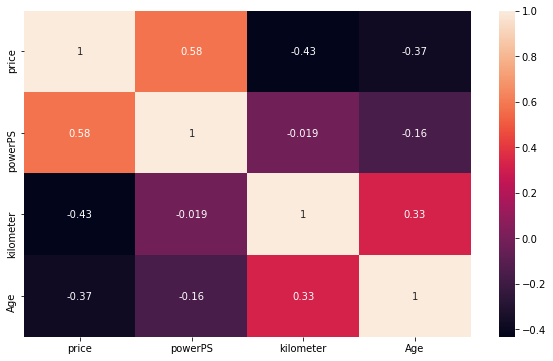

In [40]:
#checking corelation
plt.figure(figsize=(10,6))
sns.heatmap(cars.corr(),annot=True)

In [41]:
cars.isna().sum()

price                   0
vehicleType          2872
gearbox               788
powerPS                 0
kilometer               0
fuelType             2587
brand                   0
notRepairedDamage    6249
Age                     0
dtype: int64

In [42]:
cars.vehicleType.value_counts()

limousine        11705
small car         9276
station wagon     8068
bus               3593
cabrio            2765
coupe             2242
suv               1804
others             321
Name: vehicleType, dtype: int64

In [43]:
cars.vehicleType.fillna(cars.vehicleType.value_counts().index[0],inplace=True)

C:\Users\Chinmaya\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [44]:
cars.gearbox.value_counts()

manual       32489
automatic     9369
Name: gearbox, dtype: int64

In [45]:
cars.gearbox.fillna(cars.gearbox.value_counts().index[0],inplace=True)

In [46]:
cars.fuelType.value_counts()

petrol     26402
diesel     12845
lpg          690
cng           70
hybrid        36
electro       10
other          6
Name: fuelType, dtype: int64

In [47]:
cars.fuelType.fillna(cars.fuelType.value_counts().index[0],inplace=True)

In [48]:
cars.notRepairedDamage.value_counts()

no     32422
yes     3975
Name: notRepairedDamage, dtype: int64

In [49]:
cars.notRepairedDamage.fillna(cars.notRepairedDamage.value_counts().index[0],inplace=True)

In [50]:
cars.isna().sum()

price                0
vehicleType          0
gearbox              0
powerPS              0
kilometer            0
fuelType             0
brand                0
notRepairedDamage    0
Age                  0
dtype: int64

In [51]:
cars.head()

,price,vehicleType,gearbox,powerPS,kilometer,fuelType,brand,notRepairedDamage,Age
0,4450,limousine,manual,150,150000,diesel,bmw,no,16.25
1,13299,suv,manual,163,150000,diesel,volvo,no,14.50
2,3200,bus,manual,101,150000,diesel,volkswagen,no,16.92
3,4500,small car,manual,86,60000,petrol,seat,no,14.00
4,18750,suv,automatic,185,150000,diesel,volvo,no,11.92


In [52]:
#creating dummy variables 
cars = pd.get_dummies(cars,drop_first=True)

In [53]:
x = cars.drop('price',axis=1)
x.head()

,powerPS,kilometer,Age,vehicleType_cabrio,vehicleType_coupe,vehicleType_limousine,vehicleType_others,vehicleType_small car,vehicleType_station wagon,vehicleType_suv,...,brand_skoda,brand_smart,brand_sonstige_autos,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,notRepairedDamage_yes
0,150,150000,16.25,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,163,150000,14.50,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,101,150000,16.92,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,86,60000,14.00,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,185,150000,11.92,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [54]:
y = cars.price
y.head()

0     4450
1    13299
2     3200
3     4500
4    18750
Name: price, dtype: int64

<AxesSubplot:>

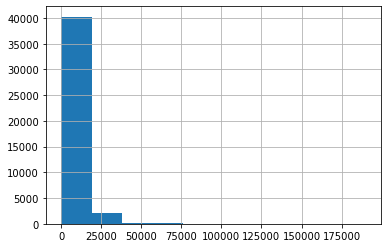

In [55]:
y.hist()

<AxesSubplot:>

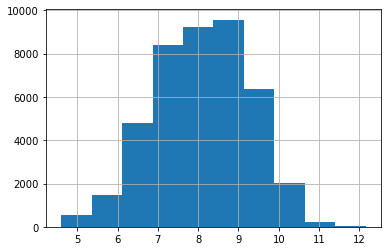

In [56]:
#appling log for output variable to follow normal distribution
y1 = np.log(y)
y1.hist()

## Building the model 

In [57]:
#importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [58]:
#Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x,y1,test_size=0.25,random_state=1)

In [59]:
print('Shape of Splitting')
print('x_train = {}, y_train = {}, x_test = {}, y_test = {}'.format(x_train.shape, y_train.shape, x_test.shape, y_test.shape))

Shape of Splitting
x_train = (31984, 57), y_train = (31984,), x_test = (10662, 57), y_test = (10662,)


## creating Baseline model

In [60]:
#assuming base prediction to be average value of output
base_pred = np.mean(y_test)

In [61]:
#repeating same till the legth of the test
base_pred = np.repeat(base_pred, len(y_test))

In [62]:
#finding RMSE
base_RMSE = np.sqrt(mean_squared_error(y_test,base_pred))
base_RMSE

1.170506696885336

## creating linear Regression model

In [63]:
lgr = LinearRegression(fit_intercept=True)

In [64]:
lgr.fit(x_train,y_train)

LinearRegression()

In [65]:
lgr_pred = lgr.predict(x_test)

In [66]:
#finding RMSE
lgr_RMSE = np.sqrt(mean_squared_error(y_test,lgr_pred))
lgr_RMSE

0.645364767748074

In [67]:
lgr.coef_

array([ 7.42784618e-03, -9.07899664e-06, -4.58693598e-02,  1.88735829e-01,
       -1.43872282e-01, -4.46174899e-01, -2.86625333e-01, -3.11459068e-01,
       -3.77605118e-01,  3.37198464e-02, -1.57832970e-02,  8.20635567e-02,
        4.63631318e-02,  1.81594429e-01, -2.97438060e-01,  1.30801162e-01,
       -4.18831107e-01,  4.66767622e-01,  4.79899472e-01,  2.29507669e-01,
       -6.87533946e-02,  5.26201297e-02,  2.79583087e-01, -3.82386289e-01,
       -1.49056361e-01,  2.56086985e-02, -5.05599296e-02,  2.33935045e-01,
        8.83762540e-02,  4.59803107e-01,  2.83213220e-01,  2.10577315e-02,
       -3.08896320e-01, -4.30839591e-02,  6.25482543e-01,  4.65269192e-02,
        4.55685199e-01,  7.41554259e-01, -9.74809005e-02,  1.22519868e-01,
        2.47275342e-02,  2.50787999e-02,  7.57256305e-01, -9.16944463e-02,
       -2.82242991e-01,  1.72430829e-01,  2.44528084e-01,  5.14416896e-01,
        2.47643360e-01,  4.83361456e-01,  7.41801861e-02,  2.54936281e-01,
        4.15959893e-01,  

In [68]:
#finding r2 values
print('test :',lgr.score(x_test,y_test))
print('train :',lgr.score(x_train,y_train))

test : 0.6960076188617843
train : 0.6893648925272899


<AxesSubplot:ylabel='price'>

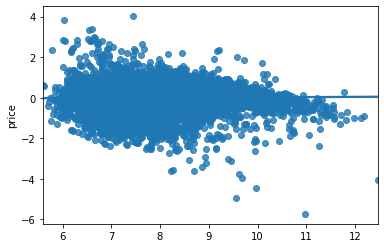

In [69]:
residuals = y_test - lgr_pred
sns.regplot(x=lgr_pred,y=residuals,scatter=True,data=cars)

<AxesSubplot:ylabel='price'>

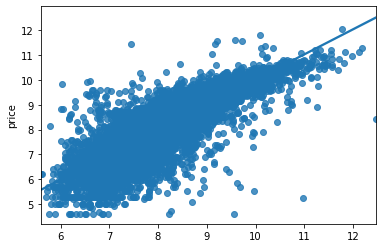

In [70]:
sns.regplot(x=lgr_pred,y=y_test,scatter=True,data=cars)

<AxesSubplot:>

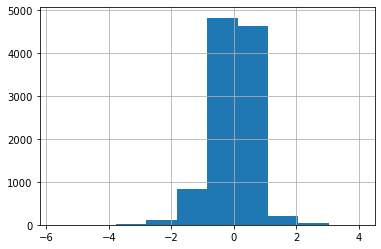

In [71]:
residuals.hist()

In [72]:
residuals.describe()

count    10662.000000
mean         0.002108
std          0.645392
min         -5.726988
25%         -0.318939
50%          0.067205
75%          0.395121
max          4.015977
Name: price, dtype: float64

mean of residuals is almost zero

## Using Regularization Methods i.e.,Ridge and Lasso

In [73]:
rid = Ridge()

In [74]:
rid.fit(x_train,y_train)

Ridge()

In [75]:
rid_pred = rid.predict(x_test)

In [76]:
#finding RMSE
rid_RMSE = np.sqrt(mean_squared_error(y_test,rid_pred))
rid_RMSE

0.6453156638799659

In [77]:
#finding r2 values
print('test :',rid.score(x_test,y_test))
print('train :',rid.score(x_train,y_train))

test : 0.6960538768375905
train : 0.6893583150100236


In [78]:
las = Lasso()
las.fit(x_train,y_train)
las_pred = las.predict(x_test)

#finding RMSE
las_RMSE = np.sqrt(mean_squared_error(y_test,las_pred))
print('RMSE For Lasso : ',las_RMSE)

#finding r2 values
print('test :',las.score(x_test,y_test))
print('train :',las.score(x_train,y_train))

RMSE For Lasso :  0.7835901174199849
test : 0.5518430926011091
train : 0.5412959171963774


## Creating  the RandomForest model

In [79]:
model = RandomForestRegressor()

In [80]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [81]:
model_pred = model.predict(x_test)

In [82]:
#finding RMSE
model_RMSE = np.sqrt(mean_squared_error(y_test,model_pred))
model_RMSE

0.4924265975147531

In [83]:
#finding r2 values
print('test :',model.score(x_test,y_test))
print('train :',model.score(x_train,y_train))

test : 0.8230155137855756
train : 0.9676078129781255


In [84]:
#Selecting optimal parameters for Random Forest using GridSearchCV
from sklearn.model_selection import GridSearchCV

In [85]:
param_grid = {
    'max_depth': [10,20],
    'max_features': [2, 3, 4],
    'min_samples_leaf': [3, 4, 5],
    'n_estimators': [100]
}

In [86]:
grid = GridSearchCV(model,param_grid,cv=5)

In [87]:
grid.fit(x,y1)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 20], 'max_features': [2, 3, 4],
                         'min_samples_leaf': [3, 4, 5], 'n_estimators': [100]})

In [88]:
grid.best_score_

0.780852508399938

In [89]:
grid.best_params_

{'max_depth': 20,
 'max_features': 4,
 'min_samples_leaf': 3,
 'n_estimators': 100}